In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from scipy import sparse
from scipy.sparse import linalg as sla
from tqdm.notebook import tqdm

In [2]:
from pyusadel import (
    DifferentialOperators,
    UsadelProblem,
    gen_assemble_fun,
    solve_usadel,
    solve_usadel_self_consistent,
)

In [10]:
Nsites = 1
do = DifferentialOperators()
do.D_x = np.zeros((1, 1), dtype=float)
do.D_y = np.zeros((1, 1), dtype=float)
do.D_z = np.zeros((1, 1), dtype=float)
do.L = np.zeros((1, 1), dtype=float)

h_x = np.array([0.2])
h_y = np.array([0])
tau_sf_inv = np.array([0.0])
tau_so_inv = np.array([0])
D = 0
T = 0.2

up = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
)

up.Delta = np.array([1])

In [11]:
up.solve_self_consistent()

  1    Max Delta: 1.112    Residual: 1.01e-01    Free energy: -9.63e-01
  2    Max Delta: 1.214    Residual: 8.41e-02    Free energy: -1.07e+00
  3    Max Delta: 1.305    Residual: 6.94e-02    Free energy: -1.16e+00
  4    Max Delta: 1.384    Residual: 5.69e-02    Free energy: -1.22e+00
  5    Max Delta: 1.451    Residual: 4.64e-02    Free energy: -1.27e+00
  6    Max Delta: 1.508    Residual: 3.77e-02    Free energy: -1.31e+00
  7    Max Delta: 1.555    Residual: 3.05e-02    Free energy: -1.33e+00
  8    Max Delta: 1.595    Residual: 2.47e-02    Free energy: -1.35e+00
  9    Max Delta: 1.627    Residual: 1.99e-02    Free energy: -1.36e+00
 10    Max Delta: 1.653    Residual: 1.60e-02    Free energy: -1.37e+00
 11    Max Delta: 1.675    Residual: 1.28e-02    Free energy: -1.37e+00
 12    Max Delta: 1.692    Residual: 1.03e-02    Free energy: -1.38e+00
 13    Max Delta: 1.706    Residual: 8.25e-03    Free energy: -1.38e+00
 14    Max Delta: 1.718    Residual: 6.61e-03    Free energy: -1

In [13]:
up.set_real_omega_ax(-3, 3, 101)
up.solve_spectral()

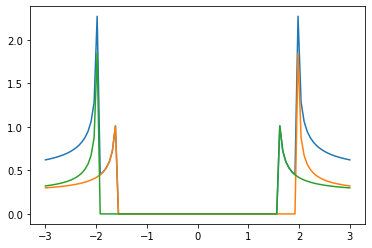

In [16]:
plt.plot(problem.get_omega_ax_r(), up.get_dos())
plt.plot(problem.get_omega_ax_r(), up.get_spin_resolved_dos("x")[0])
plt.plot(problem.get_omega_ax_r(), up.get_spin_resolved_dos("x")[1])